# Imports and reading data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use("ggplot")
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv("/kaggle/input/us-software-engineer-jobs/us-software-engineer-jobs-zenrows.csv")

# Data understanding

In [3]:
df.shape

(58433, 29)

In [4]:
df.head()

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,urgently_hiring,remote_work_model,snippet,dradis_job,link,new_job,job_link,sponsored,featured_employer,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,False,NaN,"Throughout the day, you will collaborate with ...",False,/rc/clk?jk=8ac8939f4510ebb0&fccid=b6b321949667...,False,/m/basecamp/viewjob?viewtype=embedded&jk=8ac89...,False,False,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,True,NaN,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,True,/pagead/clk?mo=r&ad=-6NYlbfkN0DHIU8kRLE0yitaMK...,False,/m/basecamp/viewjob?viewtype=embedded&jk=cf2dd...,True,False,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,False,REMOTE_ALWAYS,This person will be a senior member of the tea...,True,/company/The-Cervantes-Group/jobs/Senior-Andro...,True,/m/basecamp/viewjob?viewtype=embedded&jk=ce53e...,False,False,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,True,REMOTE_ALWAYS,The ideal candidate will have a skill for toug...,True,/pagead/clk?mo=r&ad=-6NYlbfkN0B8NUZbSwcbsGjRz9...,False,/m/basecamp/viewjob?viewtype=embedded&jk=d324e...,True,True,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,False,NaN,Proficiency in Agile software development prin...,False,/rc/clk?jk=8f941bc420d659d2&fccid=2c6850e24c8a...,True,/m/basecamp/viewjob?viewtype=embedded&jk=8f941...,False,False,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [5]:
df.dtypes

title                     object
company                   object
salary                    object
rating                   float64
review_count               int64
types                     object
location                  object
relative_time             object
hires_needed              object
hires_needed_exact        object
urgently_hiring             bool
remote_work_model         object
snippet                   object
dradis_job                  bool
link                      object
new_job                     bool
job_link                  object
sponsored                   bool
featured_employer           bool
indeed_applyable            bool
ad_id                    float64
remote_location             bool
source_id                  int64
hiring_event_job            bool
indeed_apply_enabled        bool
job_location_postal      float64
company_overview_link     object
activity_date             object
location_extras           object
dtype: object

In [6]:
df.describe()

,rating,review_count,ad_id,source_id,job_location_postal
count,58433.000000,58433.000000,2.362600e+04,5.843300e+04,26121.000000
mean,2.565040,1604.469050,3.376991e+08,6.605754e+06,52579.873627
std,1.832927,5894.934474,8.307966e+07,7.333885e+06,33371.519030
min,0.000000,0.000000,9.826900e+04,1.700000e+01,603.000000
25%,0.000000,0.000000,3.616971e+08,1.571000e+04,20877.000000
50%,3.500000,14.000000,3.694296e+08,3.370807e+06,53122.000000
75%,4.000000,624.000000,3.716887e+08,1.307450e+07,87124.000000
max,5.000000,223345.000000,3.725696e+08,2.077308e+07,99901.000000


In [7]:
df.columns

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')

# Data preparation

In [8]:
df.isnull().sum()

title                        0
company                      3
salary                   40330
rating                       0
review_count                 0
types                    15856
location                     0
relative_time                0
hires_needed             46576
hires_needed_exact       39994
urgently_hiring              0
remote_work_model        35629
snippet                      8
dradis_job                   0
link                         0
new_job                      0
job_link                     0
sponsored                    0
featured_employer            0
indeed_applyable             0
ad_id                    34807
remote_location              0
source_id                    0
hiring_event_job             0
indeed_apply_enabled         0
job_location_postal      32312
company_overview_link    22138
activity_date            44632
location_extras          46983
dtype: int64

In [9]:
df = df.drop(['salary','types','hires_needed','hires_needed_exact','remote_work_model','ad_id','job_location_postal','company_overview_link','activity_date','location_extras'], axis=1)

In [10]:
df.head(3)

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,dradis_job,link,new_job,job_link,sponsored,featured_employer,indeed_applyable,remote_location,source_id,hiring_event_job,indeed_apply_enabled
0,Android Developer,Shockoe,0.0,0,"Richmond, VA",30+ days ago,False,"Throughout the day, you will collaborate with ...",False,/rc/clk?jk=8ac8939f4510ebb0&fccid=b6b321949667...,False,/m/basecamp/viewjob?viewtype=embedded&jk=8ac89...,False,False,False,False,11706594,False,False
1,Web Developer,"Denios, Inc.",0.0,0,"Louisville, KY",30+ days ago,True,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,True,/pagead/clk?mo=r&ad=-6NYlbfkN0DHIU8kRLE0yitaMK...,False,/m/basecamp/viewjob?viewtype=embedded&jk=cf2dd...,True,False,True,False,11468052,False,True
2,Sr. Android Developer,The Cervantes Group,4.1,22,Remote,6 days ago,False,This person will be a senior member of the tea...,True,/company/The-Cervantes-Group/jobs/Senior-Andro...,True,/m/basecamp/viewjob?viewtype=embedded&jk=ce53e...,False,False,True,False,9570478,False,True


In [11]:
df.isnull().sum()

title                   0
company                 3
rating                  0
review_count            0
location                0
relative_time           0
urgently_hiring         0
snippet                 8
dradis_job              0
link                    0
new_job                 0
job_link                0
sponsored               0
featured_employer       0
indeed_applyable        0
remote_location         0
source_id               0
hiring_event_job        0
indeed_apply_enabled    0
dtype: int64

In [12]:
df = df.drop(['dradis_job','link','new_job','job_link','indeed_applyable','indeed_apply_enabled','source_id','hiring_event_job'], axis=1)

In [13]:
df.dtypes

title                 object
company               object
rating               float64
review_count           int64
location              object
relative_time         object
urgently_hiring         bool
snippet               object
sponsored               bool
featured_employer       bool
remote_location         bool
dtype: object

In [14]:
df.head(2)

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,sponsored,featured_employer,remote_location
0,Android Developer,Shockoe,0.0,0,"Richmond, VA",30+ days ago,False,"Throughout the day, you will collaborate with ...",False,False,False
1,Web Developer,"Denios, Inc.",0.0,0,"Louisville, KY",30+ days ago,True,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,True,False,False


In [15]:
def handle_bools(x):
    if x == True:
        return 1
    else:
        return 0

In [16]:
df['featured_employer'] = df['featured_employer'].apply(handle_bools)
df['remote_location'] = df['remote_location'].apply(handle_bools)
df['sponsored'] = df['sponsored'].apply(handle_bools)
df['urgently_hiring'] = df['urgently_hiring'].apply(handle_bools)

In [17]:
df.head()

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,sponsored,featured_employer,remote_location
0,Android Developer,Shockoe,0.0,0,"Richmond, VA",30+ days ago,0,"Throughout the day, you will collaborate with ...",0,0,0
1,Web Developer,"Denios, Inc.",0.0,0,"Louisville, KY",30+ days ago,1,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,1,0,0
2,Sr. Android Developer,The Cervantes Group,4.1,22,Remote,6 days ago,0,This person will be a senior member of the tea...,0,0,0
3,Junior Software Engineer,Medical Knowledge Group,0.0,0,Remote,8 days ago,1,The ideal candidate will have a skill for toug...,1,1,0
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,4.1,548,"Kansas City, MO",2 days ago,0,Proficiency in Agile software development prin...,0,0,0


In [18]:
df.shape

(58433, 11)

In [19]:
df.loc[df.duplicated(subset=['company'])]

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,sponsored,featured_employer,remote_location
24,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
43,"Sr Software Engineer, Catalog Platform - Tableau",Salesforce,4.3,767,"Seattle, WA",6 days ago,0,Designing and developing service-oriented syst...,0,0,0
50,Lead Software Engineer – Integration Platform ...,Athenahealth,2.9,83,"Watertown, MA",30+ days ago,0,6-8 years of software engineering experience.\...,0,0,0
63,Production Support Software Engineer - Salesfo...,Salesforce,4.3,767,Texas,6 days ago,0,Developer-level technical chops along with a s...,1,0,0
72,"Prin, Back-End Dev",BNY Mellon,3.5,4757,"New York, NY",30+ days ago,0,Integrate software components into a fully fun...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
58427,Lead Site Reliability Engineer,InVision,4.3,20,Oregon,Today,0,Compassion for product engineers operating the...,0,0,0
58429,Senior Software Engineer (TCAT),Think Surgical,3.4,14,"Fremont, CA",30+ days ago,0,Design software in C++ for robotic surgical de...,0,0,0
58430,Software Engineer,"Terma North America, Inc.",5.0,1,"Warner Robins, GA",9 days ago,0,Design and implement MS Windows desktop softwa...,1,0,0
58431,Systems Analyst/Programmer,Grant Blackford Mental Health,3.0,21,"Marion, IN",2 days ago,0,Requires the use of a variety of computer rela...,1,0,0


In [20]:
df.query('title == "Real-Time, Embedded Software Engineer"')

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,sponsored,featured_employer,remote_location
7,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Francisco Bay Area, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
24,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
371,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
1167,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
1847,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"Los Angeles, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
10561,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
13901,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"Los Angeles, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
14546,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"Los Angeles, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
14967,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0
15694,"Real-Time, Embedded Software Engineer",Checkmate Partners,0.0,0,"San Jose, CA",5 days ago,0,Embedded software: 3 years (Required).\n This ...,1,0,0


In [21]:
df = df.drop_duplicates()

# Feature understanding
Univariate analysis

In [22]:
df['title'].value_counts()

title
Software Engineer                                        1286
Senior Software Engineer                                 1268
DevOps Engineer                                           448
Software Developer                                        346
Full Stack Developer                                      255
                                                         ... 
Embedded Engineer with Java                                 1
Vespel® Application Development Engineer – Industrial       1
Sr. Mobile Developer (IOS)                                  1
Mobile Software Engineer, Android                           1
Senior Engineer II-Software                                 1
Name: count, Length: 17633, dtype: int64

Text(0, 0.5, 'Count')

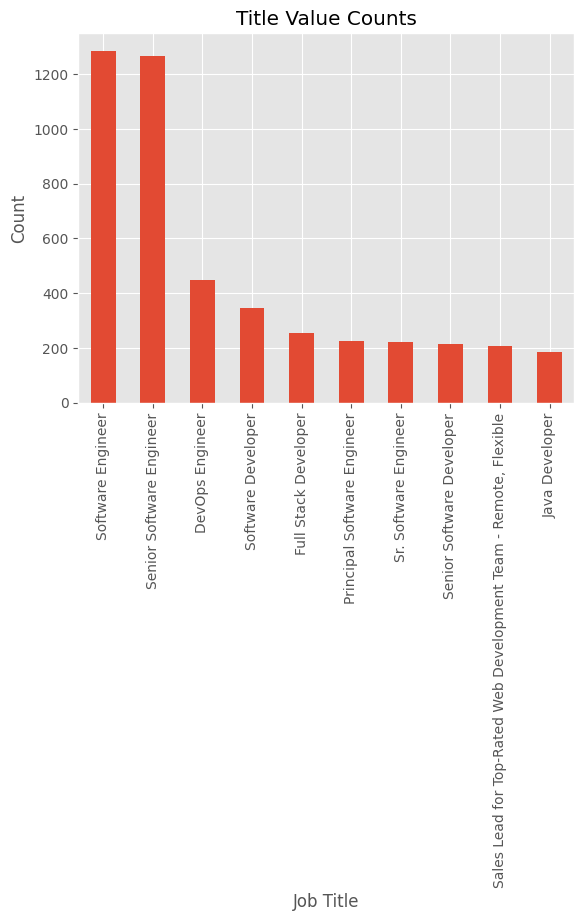

In [23]:
df['title'].value_counts() \
.head(10) \
.plot(kind='bar', rot=90, title='Title Value Counts') 
plt.xlabel('Job Title')
plt.ylabel('Count')

Text(0.5, 0, 'Rating distrubution')

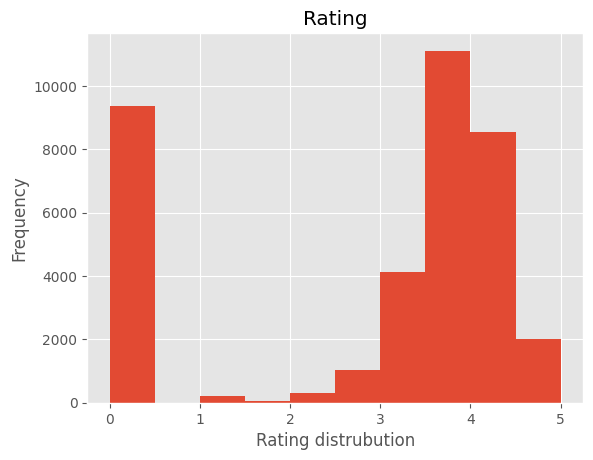

In [24]:
df['rating'].plot(kind='hist', bins=10, title='Rating')
plt.xlabel('Rating distrubution')

In [25]:
df.head(3)

,title,company,rating,review_count,location,relative_time,urgently_hiring,snippet,sponsored,featured_employer,remote_location
0,Android Developer,Shockoe,0.0,0,"Richmond, VA",30+ days ago,0,"Throughout the day, you will collaborate with ...",0,0,0
1,Web Developer,"Denios, Inc.",0.0,0,"Louisville, KY",30+ days ago,1,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,1,0,0
2,Sr. Android Developer,The Cervantes Group,4.1,22,Remote,6 days ago,0,This person will be a senior member of the tea...,0,0,0


Text(0, 0.5, 'Urgently hiring')

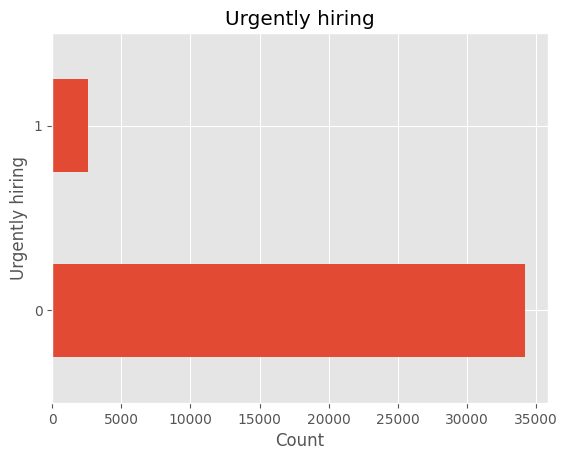

In [26]:
df['urgently_hiring'].value_counts() \
.plot(kind='barh', title='Urgently hiring')
plt.xlabel("Count")
plt.ylabel("Urgently hiring")

Text(0, 0.5, 'Remote location')

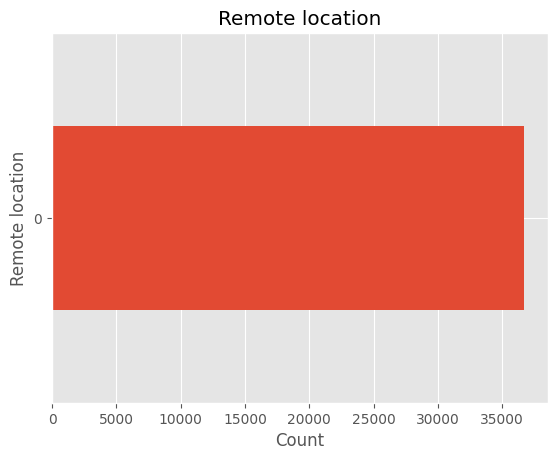

In [27]:
df['remote_location'].value_counts() \
.plot(kind='barh', title='Remote location')
plt.xlabel("Count")
plt.ylabel("Remote location")

Text(0, 0.5, 'count')

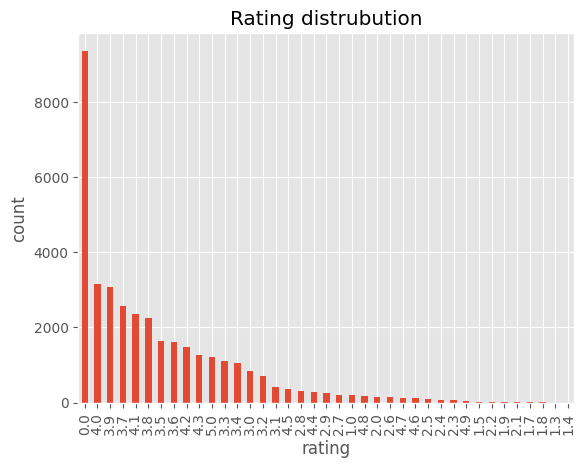

In [28]:
df['rating'].value_counts(ascending=False) \
.plot(kind='bar', title = 'Rating distrubution')
plt.ylabel("count")

# Feature Relationships

Text(0, 0.5, 'Review count')

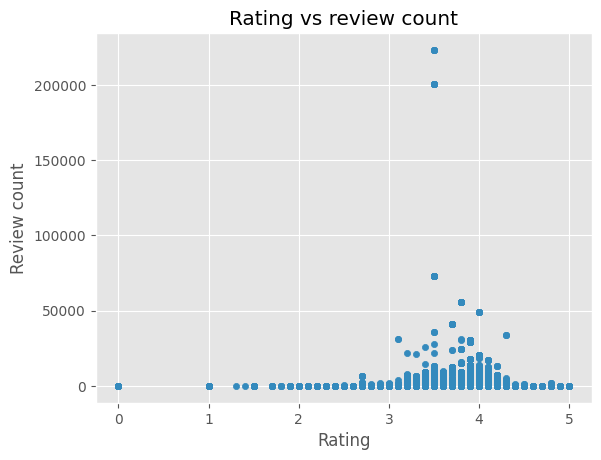

In [29]:
df.plot(kind='scatter',
        x='rating',
        y='review_count', title='Rating vs review count')
plt.xlabel('Rating'),
plt.ylabel('Review count')

Text(0, 0.5, 'Review count')

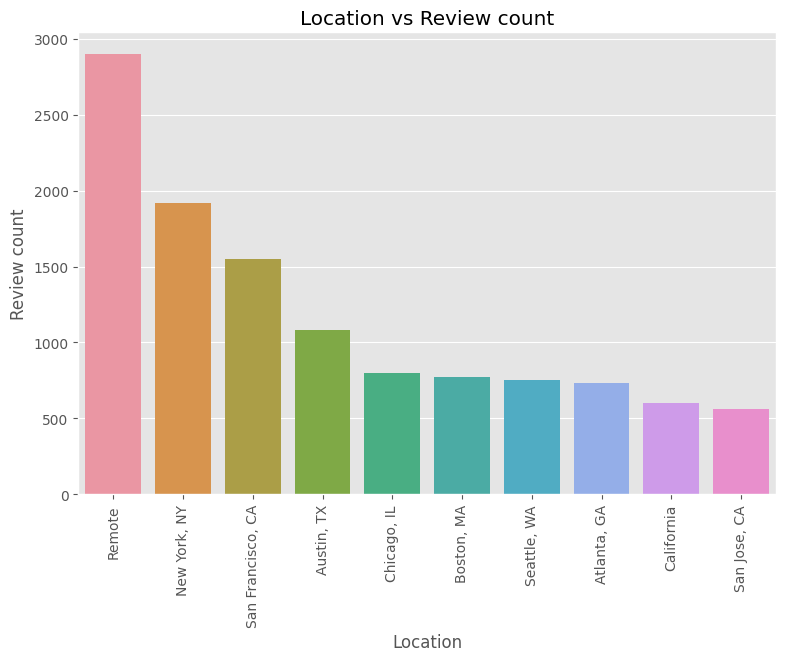

In [30]:
top_10_locations = df['location'].value_counts(ascending=False).head(10)
top_10_reviewcount = df['review_count'].value_counts(ascending=False).head(10)
plt.figure(figsize=(9, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.xticks(rotation=90)
plt.title('Location vs Review count')
plt.xlabel('Location')
plt.ylabel('Review count')